/tmp/ipykernel_3709/2931726335.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return (4*(x2-1))/(4*(x2-1)+x2**2*np.sinh(2*np.pi/5*1000/16*np.sqrt(x2-1))**2)


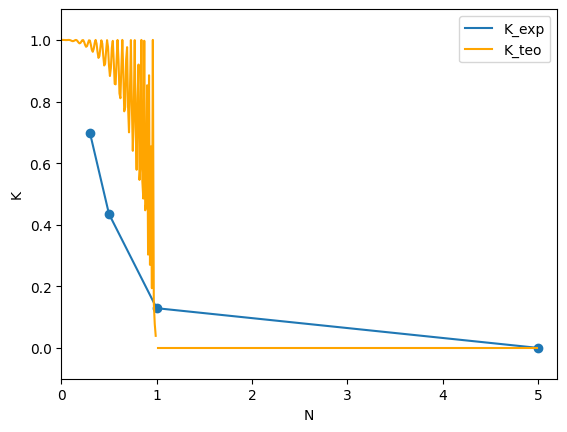

In [16]:
#Programa para graficar el coeficiente de transmisión experimental y el teórico

import numpy as np
import math
import matplotlib.pyplot as plt

datos_coef = np.loadtxt("K_teo.txt")


N1=datos_coef[:,0]
K=datos_coef[:,1]


def K_teo_neg(x1):
    return (4.0*(1.0-x1))/(4.0*(1.0-x1)+x1**2*np.sin(2*np.pi/5.0*1000.0/16.0*np.sqrt(1.0-x1))**2)

def K_teo_pos(x2):
    return (4*(x2-1))/(4*(x2-1)+x2**2*np.sinh(2*np.pi/5*1000/16*np.sqrt(x2-1))**2)


var1=np.arange(0,1,0.01)
var2=np.arange(1,5,0.01)


plt.ylim(-0.1,1.1)
plt.xlim(0,5.2)



plt.scatter(N1, K)
plt.plot(N1, K, label='K_exp')

plt.plot(var1, [K_teo_neg(i) for i in var1], label='K_teo', color='orange')
plt.plot(var2, [K_teo_pos(i) for i in var2], color='orange')

plt.xlabel('N')
plt.ylabel('K')

plt.legend()

plt.show()

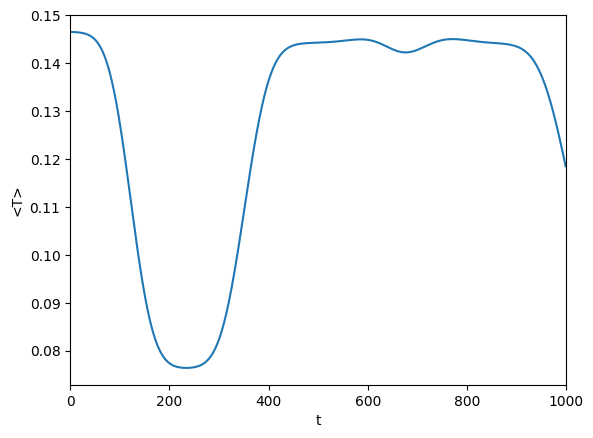

In [7]:
#Programa para graficar los valores esperados

import numpy as np
import matplotlib.pyplot as plt

datos=np.loadtxt('Ecinetica.txt')

t=datos[:,0]
y=datos[:,1]

plt.xlim(0,1000)
plt.plot(t,y)

plt.xlabel('t')
plt.ylabel('<T>')
plt.show()



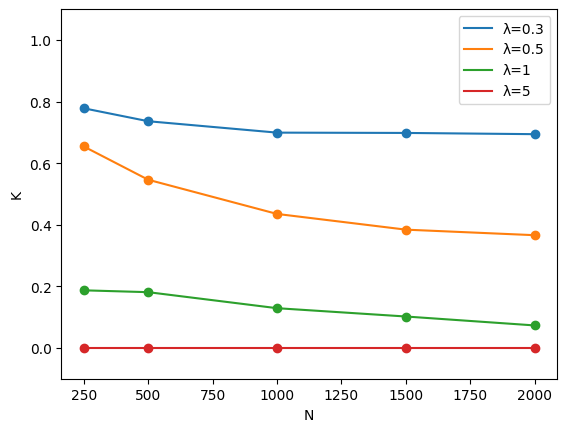

In [4]:
#Programa para graficar el coeficiente de transmisión experimental para distintos N y lambda

import numpy as np
import matplotlib.pyplot as plt

datos_l1 = np.loadtxt("03.txt")
datos_l2 = np.loadtxt("05.txt")
datos_l3 = np.loadtxt("1.txt")
datos_l4 = np.loadtxt("5.txt")

N1=datos_l1[:,0]
K1=datos_l1[:,1]

N2=datos_l2[:,0]
K2=datos_l2[:,1]

N3=datos_l3[:,0]
K3=datos_l3[:,1]

N4=datos_l4[:,0]
K4=datos_l4[:,1]

plt.ylim(-0.1,1.1)

plt.scatter(N1, K1)
plt.plot(N1, K1,label='λ=0.3')

plt.scatter(N2, K2)
plt.plot(N2, K2, label='λ=0.5')

plt.scatter(N3, K3)
plt.plot(N3, K3, label='λ=1')

plt.scatter(N4, K4)
plt.plot(N4, K4, label='λ=5')

plt.legend()




plt.xlabel('N')
plt.ylabel('K')
plt.show()

Text(0, 0.5, 'K')

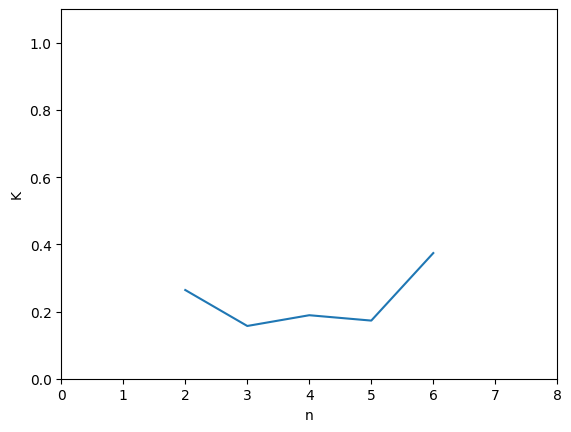

In [2]:
#Programa para graficar K en función de n y establecer el posible ajuste

import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt("multiples.txt")
xdata=data[0:,0]
ydata=data[0:,1]


plt.xlim(0,8)
plt.ylim(0,1.1)

plt.plot(xdata,ydata)

plt.xlabel("n")
plt.ylabel("K")


a= 0.7049999999993606
b= -0.3009714285742684
c= 0.040571428569336154
R^2= 0.17328537826839066


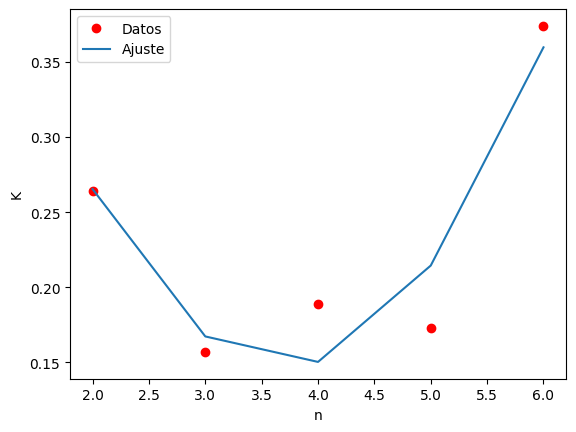

In [6]:
#Programa para realizar el ajuste entre K y n

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats
import csv

#función del ajuste
def func(x,a,b,c):
    return a+b*x+c*x**2

#datos a ajustar
data=np.loadtxt("multiples.txt")
xdata=data[0:,0]
ydata=data[0:,1]
#para leer datos de archivo, mydata=np.loadtxt('mydata.txt')



#hacemos el ajuste
popt, pcov =curve_fit(func, xdata, ydata) 
#popt calcula los parámetros del ajuste 
#pcov estima la varianza de los parámetros. La diagonal proporciona la varianza de los parámetros estimados


#estadísticas (si hay incertidumbres)
stats=scipy.stats.linregress(xdata,ydata)

plt.plot(xdata, ydata, 'ro', label='Datos') #datos
plt.plot(xdata, func(xdata, *popt), label='Ajuste')

plt.xlabel("n")
plt.ylabel("K")

plt.legend()

print("a=",popt[0])
print("b=",popt[1])
print("c=",popt[2])
print("R^2=",stats.rvalue**2)


plt.show()